### Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

### Data Exploration


In [2]:
df = pd.read_csv('Synthetic_app_data.csv')

In [3]:
df.head()

,Average Response Time (s),Number of Features,Number of Bugs Reported,Training Hours Provided,User Satisfaction Score
0,1.436350,49,16,3.970126,89.980978
1,2.876786,36,12,3.100364,56.732146
2,2.329985,34,0,2.667305,121.502856
3,1.996646,39,1,4.469463,124.535638
4,0.890047,44,8,3.942986,129.077397


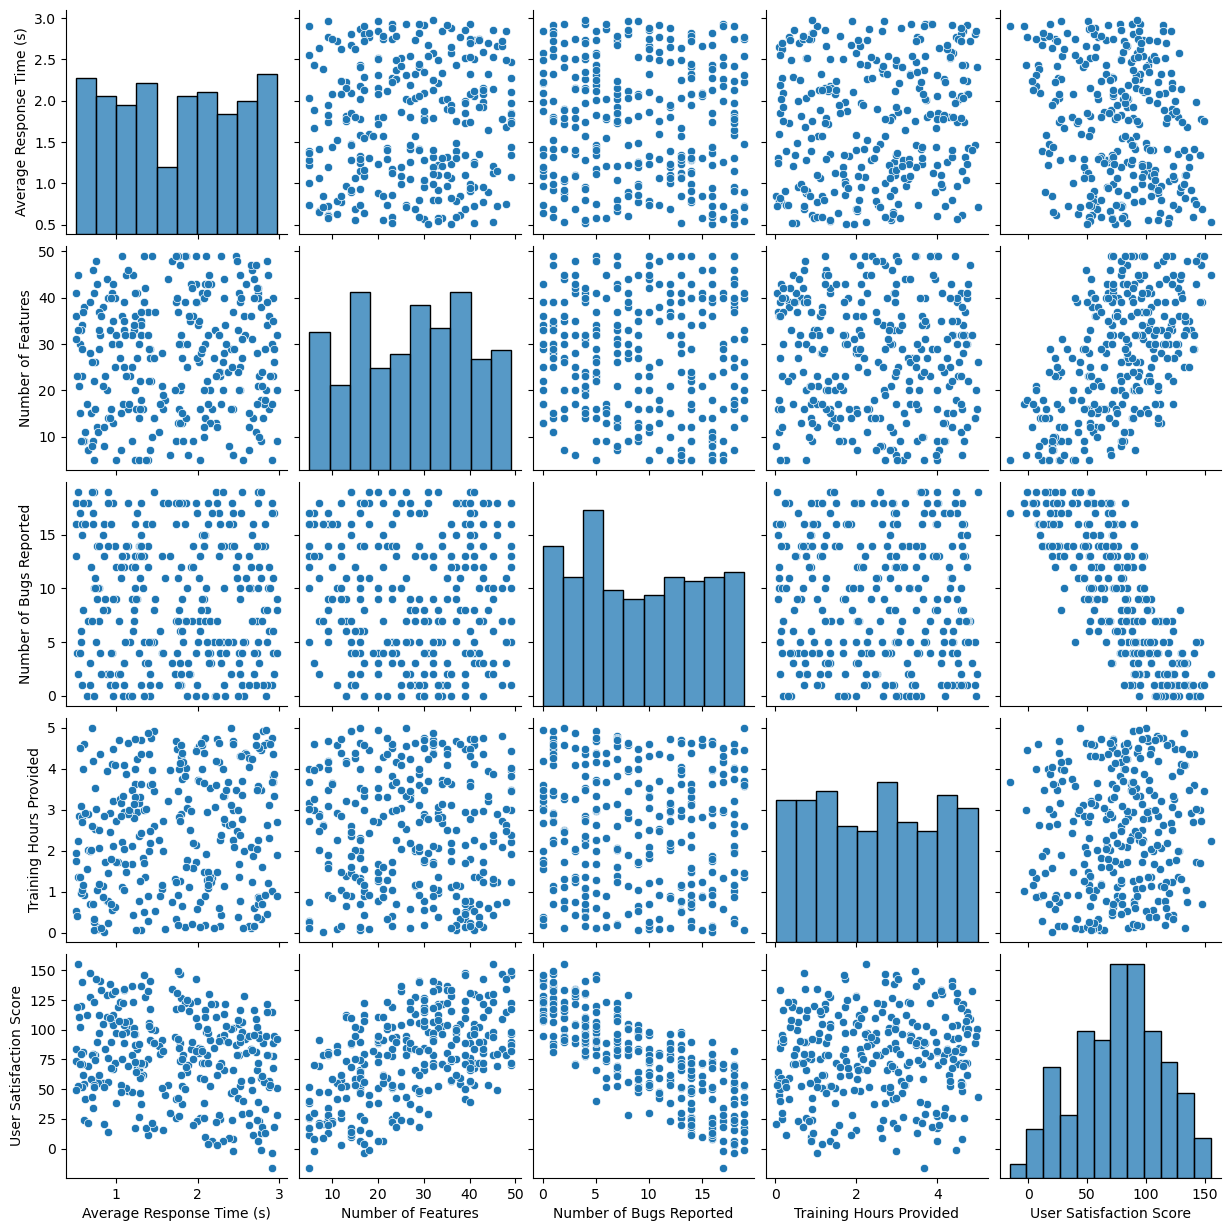

In [4]:
sns.pairplot(df)

Observation: The User satisfaction score is linear to number of bugs reported, number of features and average response time. Also I'm able to see the distribution of each attribute


In [10]:
df.shape

(300, 5)

#### Data preparation for Model building

In [61]:
dependent = df['User Satisfaction Score'].values
independent = df.iloc[:,0:4].values


In [62]:
train_x,test_x,train_y,test_y = train_test_split(independent,dependent,random_state=32,test_size = 0.3)

### Model building - Linear Regression

In [ ]:
lr = LinearRegression()

In [73]:
lr.fit(train_x,train_y)
predictions = lr.predict(test_x)
mse = mean_squared_error(test_y,predictions)
mae = mean_absolute_error(test_y,predictions)
rmse = mse**0.5
r2 = r2_score(test_y,predictions)


Mean Squared Error is:  29.17


In [68]:
coeff = lr.coef_

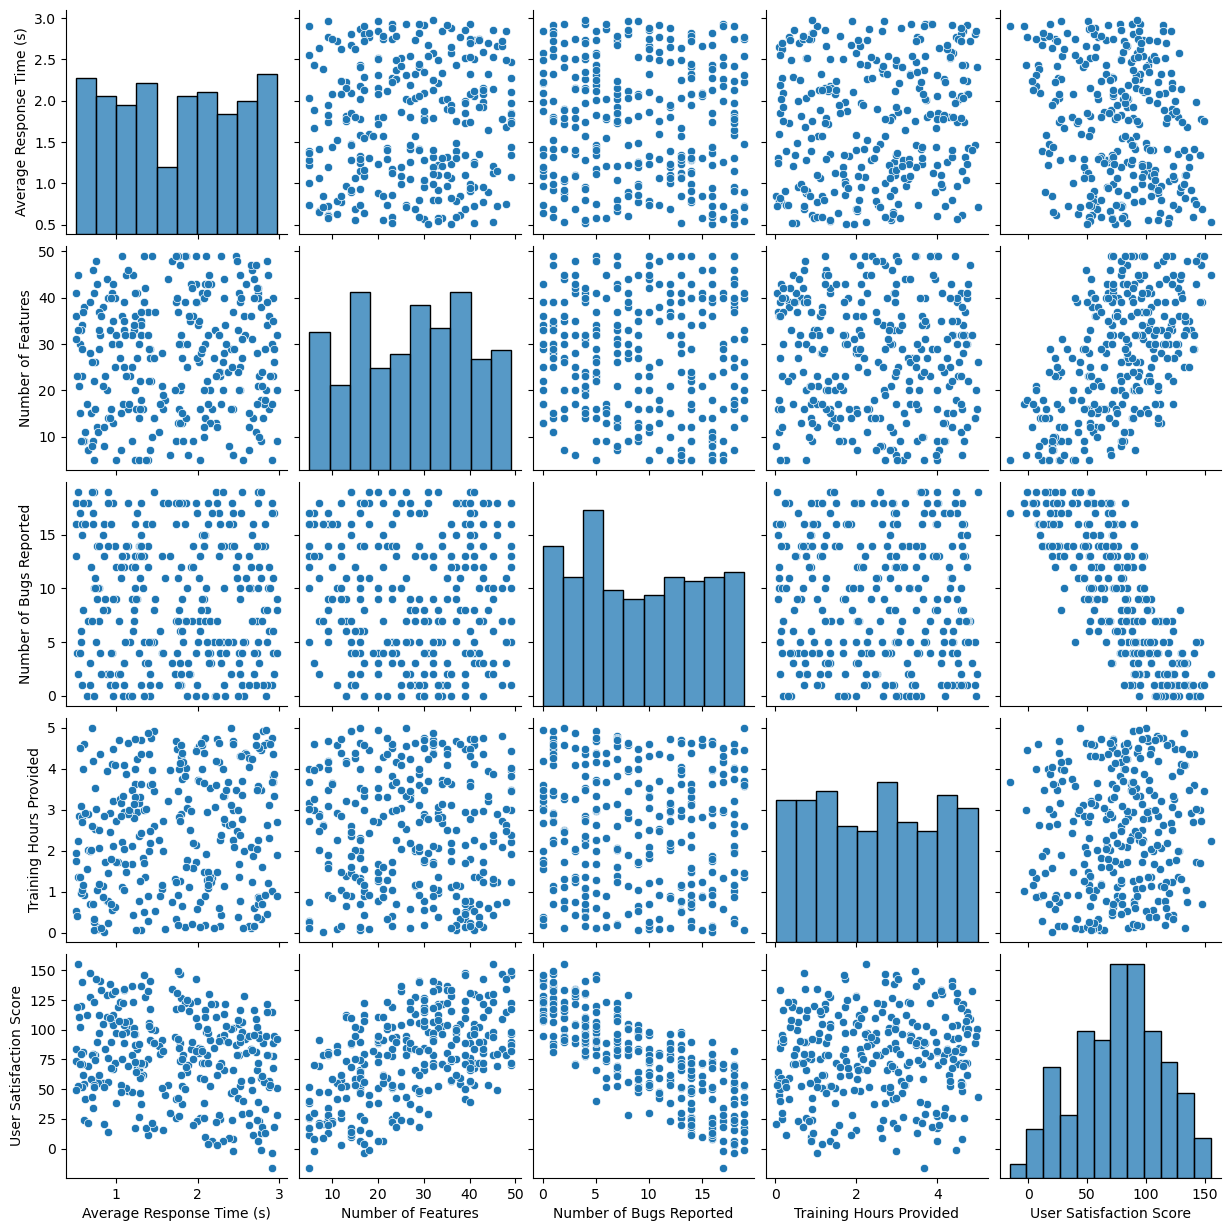

Intercept (bias):  98.71827845986626
Coefficients:
Average Response Time (s):  -14.756930108266092
Number of Features:  1.4818018771142167
Number of Bugs Reported:  -4.970485762028447
Training Hours Provided:  3.4457589558143407


Evaluation Metrics on Training Set: 

Mean Absolute Error (MAE): 4.423233012901478
Mean Square Error (MAE): 29.174613356837174
Root Mean Square Error (RMSE): 5.4013529191154666
R-squared(R2): 0.9811907398197638


In [84]:
sns.pairplot(df)
plt.show()
print('Intercept (bias): ',lr.intercept_)
print('Coefficients:')
print('Average Response Time (s): ',coeff[0])
print('Number of Features: ',coeff[1])
print('Number of Bugs Reported: ',coeff[2])
print('Training Hours Provided: ',coeff[3])

print('\n')

print('Evaluation Metrics on Training Set: \n')

print('Mean Absolute Error (MAE):', mae)
print('Mean Square Error (MSE):', mse)
print('Root Mean Square Error (RMSE):', rmse)
print('R-squared(R2):', r2)


Taking up the MSE to be main evaluation metric because it would possibly penalize heavier incase of outliers making the model be more accurate on predicting the User Satisfaction score

In [89]:
##Bonus - Usinf specific column for the model

new_indep = df['Number of Features'].values.reshape(-1,1)
dependent = df['User Satisfaction Score'].values
train_x_new , test_x_new, train_y_new , test_y_new = train_test_split(new_indep, dependent, random_state=32, test_size = 0.3)
lr.fit(train_x_new,train_y_new)
predictions_new = lr.predict(test_x_new)
mse = mean_squared_error(test_y_new,predictions_new)
print(mse)

1007.279838693613
